In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
# print(df.shape)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.isnull().sum()

ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,5,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,2,5,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,4,5,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,5,5,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,8,5,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

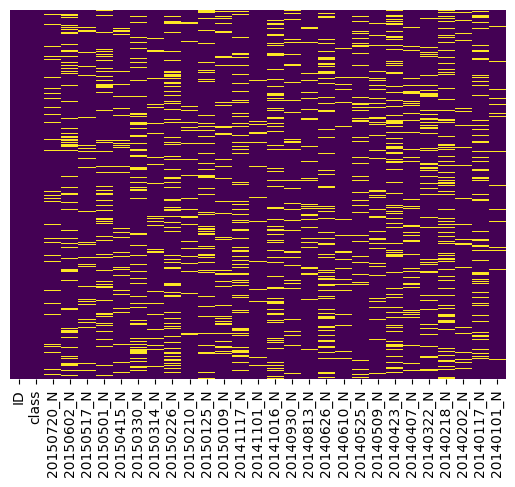

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
plt.show()

In [8]:
features = df.iloc[:, 2:]
target = df.loc[:, 'class']

In [9]:
# for col in features:
#     col_mean = df[col].mean()
#     df[col] = df[col].fillna(col_mean)
print(df.head())

for col in features:
    a = df.groupby('class')[col].mean()
    # if(4200.370710 in a): print("YES")
    for i in range(len(a)):
        if(a[i].round(0) == 4470): print(f"{col} {i}")
    # print(a)
    for i in df.index:
        if np.isnan(df.loc[i, col]):
            df.loc[i, col] = a[df['class'][i]]

df.head()
# df.isnull().sum()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


   ID  class  20150720_N  20150602_N  20150517_N  20150501_N  20150415_N  \
0   1      5    637.5950     658.668   -1882.030    -1924.36     997.904   
1   2      5    634.2400     593.705   -1625.790    -1672.32     914.198   
2   4      5     58.0174   -1599.160         NaN    -1052.63         NaN   
3   5      5     72.5180         NaN     380.436    -1256.93     515.805   
4   8      5   1136.4400         NaN         NaN     1647.83    1935.800   

   20150330_N  20150314_N  20150226_N  ...  20140610_N  20140525_N  \
0   -1739.990     630.087         NaN  ...         NaN   -1043.160   
1    -692.386     707.626   -1670.590  ...         NaN    -933.934   
2   -1564.630         NaN     729.790  ...    -1025.88     368.622   
3   -1413.180    -802.942     683.254  ...    -1813.95     155.624   
4         NaN    2158.980         NaN  ...     1535.00    1959.430   

   20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  20140202_N  \
0   -1942.490     267.138         NaN        

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,5,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,527.135156,...,2013.680657,-1043.160,-1942.490000,267.138,1127.101172,987.976689,211.328,-2203.020,-1180.190000,433.906
1,2,5,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,-1670.590000,...,2013.680657,-933.934,-625.385000,120.059,364.858000,476.972000,220.878,-2250.000,-1360.560000,524.075
2,4,5,58.0174,-1599.160000,1101.121938,-1052.63,1037.900596,-1564.630000,1131.306331,729.790000,...,-1025.880000,368.622,1217.060015,-1227.800,304.621000,987.976689,369.214,-2202.120,973.156134,-1343.550
3,5,5,72.5180,1628.972375,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,683.254000,...,-1813.950000,155.624,1217.060015,-924.073,432.150000,282.833000,298.320,-2197.360,973.156134,-826.727
4,8,5,1136.4400,1628.972375,1101.121938,1647.83,1935.800000,931.040746,2158.980000,527.135156,...,1535.000000,1959.430,-279.317000,-384.915,-113.406000,1020.720000,1660.650,-116.801,-568.050000,-1357.140


In [10]:
features = df.iloc[:, 2:]
target = df.loc[:, 'class']

features.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,527.135156,-1325.64,-944.08400,...,2013.680657,-1043.160,-1942.490000,267.138,1127.101172,987.976689,211.328,-2203.020,-1180.190000,433.906
1,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,-1670.590000,-1408.64,-989.28500,...,2013.680657,-933.934,-625.385000,120.059,364.858000,476.972000,220.878,-2250.000,-1360.560000,524.075
2,58.0174,-1599.160000,1101.121938,-1052.63,1037.900596,-1564.630000,1131.306331,729.790000,-3162.14,1082.29064,...,-1025.880000,368.622,1217.060015,-1227.800,304.621000,987.976689,369.214,-2202.120,973.156134,-1343.550
3,72.5180,1628.972375,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,683.254000,-2829.40,-1267.54000,...,-1813.950000,155.624,1217.060015,-924.073,432.150000,282.833000,298.320,-2197.360,973.156134,-826.727
4,1136.4400,1628.972375,1101.121938,1647.83,1935.800000,931.040746,2158.980000,527.135156,1242.87,-2646.05000,...,1535.000000,1959.430,-279.317000,-384.915,-113.406000,1020.720000,1660.650,-116.801,-568.050000,-1357.140


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=18, stratify=target)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# le = LabelEncoder()
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(le.classes_))),
    target_names=le.classes_
))

              precision    recall  f1-score   support

        farm       0.78      0.66      0.71       168
      forest       0.93      0.97      0.95      1232
       grass       0.57      0.33      0.42        39
  impervious       0.87      0.88      0.87       134
     orchard       1.00      0.17      0.29         6
       water       1.00      0.67      0.80        21

    accuracy                           0.91      1600
   macro avg       0.86      0.61      0.67      1600
weighted avg       0.90      0.91      0.90      1600



In [13]:
test_data = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2845 non-null   int64  
 1   ID          2845 non-null   int64  
 2   20150720_N  2845 non-null   float64
 3   20150602_N  2845 non-null   float64
 4   20150517_N  2845 non-null   float64
 5   20150501_N  2845 non-null   float64
 6   20150415_N  2845 non-null   float64
 7   20150330_N  2845 non-null   float64
 8   20150314_N  2845 non-null   float64
 9   20150226_N  2845 non-null   float64
 10  20150210_N  2845 non-null   float64
 11  20150125_N  2845 non-null   float64
 12  20150109_N  2845 non-null   float64
 13  20141117_N  2845 non-null   float64
 14  20141101_N  2845 non-null   float64
 15  20141016_N  2845 non-null   float64
 16  20140930_N  2845 non-null   float64
 17  20140813_N  2845 non-null   float64
 18  20140626_N  2845 non-null   float64
 19  20140610_N  2845 non-null  

In [14]:
test_data = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
test_data.info()

ID = test_data['ID']
test_data.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2845 non-null   int64  
 1   ID          2845 non-null   int64  
 2   20150720_N  2845 non-null   float64
 3   20150602_N  2845 non-null   float64
 4   20150517_N  2845 non-null   float64
 5   20150501_N  2845 non-null   float64
 6   20150415_N  2845 non-null   float64
 7   20150330_N  2845 non-null   float64
 8   20150314_N  2845 non-null   float64
 9   20150226_N  2845 non-null   float64
 10  20150210_N  2845 non-null   float64
 11  20150125_N  2845 non-null   float64
 12  20150109_N  2845 non-null   float64
 13  20141117_N  2845 non-null   float64
 14  20141101_N  2845 non-null   float64
 15  20141016_N  2845 non-null   float64
 16  20140930_N  2845 non-null   float64
 17  20140813_N  2845 non-null   float64
 18  20140626_N  2845 non-null   float64
 19  20140610_N  2845 non-null  

In [15]:
test_res = model.predict(test_data)

result_decoded = le.inverse_transform(test_res)
result_decoded

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['orchard', 'orchard', 'orchard', ..., 'water', 'water',
       'impervious'], dtype=object)

In [16]:
result = pd.DataFrame({'ID':ID, 'class':result_decoded})
result

,ID,class
0,1,orchard
1,2,orchard
2,3,orchard
3,4,orchard
4,5,orchard
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [17]:
result.to_csv("submission.csv", index=False)